In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [45]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

data= pd.read_excel('hypothesis1.xlsx', sheetname='Sheet1')

print("Column headings:")
print(data.columns)

Column headings:
Index(['Countries', 'Under5_Mortality_Rate_Male',
       'Prim_school_net_enrol_ratio', 'water_2015_total', 'polio3',
       'sanitation_2015_total', 'Life_expectancy_females',
       'Adult_literacy_rate_females', 'EnrolmentRatio_PrimaryGER',
       'EnrolmentRatio_SecondaryGER', 'Antenatalcare_AtleastOneVisit',
       'Antenatalcare_Atleast4Visit', 'DeliverCare_Skilled_birth_attendant',
       'youth_litereacy_male', 'MobilePhone', 'InternetUser',
       'Lower_Sec_School_Gross_Enroll_Ratio',
       'Upper_Sec_School_Gross_Enrol_Ratio'],
      dtype='object')


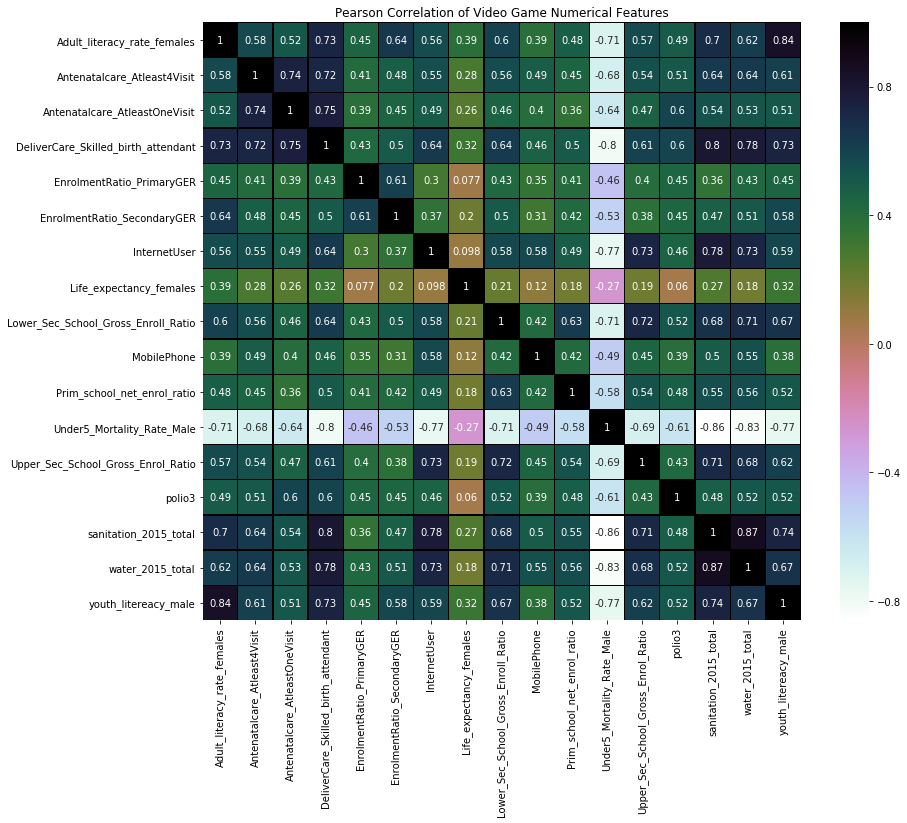

In [3]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = data[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

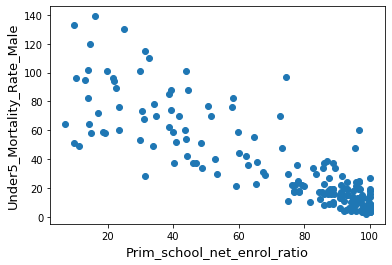

In [4]:
fig, ax = plt.subplots()
ax.scatter(x = data['sanitation_2015_total'], y = data['Under5_Mortality_Rate_Male'])
plt.ylabel('Under5_Mortality_Rate_Male', fontsize=13)
plt.xlabel('Prim_school_net_enrol_ratio', fontsize=13)
plt.show()

In [5]:
X=data[['Prim_school_net_enrol_ratio','water_2015_total','polio3','sanitation_2015_total','Life_expectancy_females','Adult_literacy_rate_females',
'EnrolmentRatio_PrimaryGER','EnrolmentRatio_SecondaryGER','Antenatalcare_AtleastOneVisit','Antenatalcare_Atleast4Visit'
,'DeliverCare_Skilled_birth_attendant','youth_litereacy_male','MobilePhone','InternetUser','Lower_Sec_School_Gross_Enroll_Ratio','Upper_Sec_School_Gross_Enrol_Ratio']]
Y=data[['Under5_Mortality_Rate_Male']]

In [6]:
print(X.shape)
print(Y.shape)

(202, 16)
(202, 1)


In [7]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X, Y)
print(lreg.score(X, Y))

0.8492197663877813


In [9]:
import statsmodels.api as sm
from scipy.stats.mstats import zscore

print(sm.OLS(zscore(Y), zscore(X)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              65.47
Date:                Fri, 27 Mar 2020   Prob (F-statistic):                    1.99e-67
Time:                        15:30:27   Log-Likelihood:                         -95.540
No. Observations:                 202   AIC:                                      223.1
Df Residuals:                     186   BIC:                                      276.0
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
import statsmodels.api as sm
from scipy.stats.mstats import zscore
sanitation=zscore(data[['sanitation_2015_total']])
internet=zscore(data[['InternetUser']])
water=zscore(data[['water_2015_total']])
literacy=zscore(data[['youth_litereacy_male']])
healthcare=zscore(data[['Antenatalcare_AtleastOneVisit']])






In [29]:
Five_Factor_Index=[]

In [34]:


sum_list=sanitation+internet+water+literacy+healthcare

In [35]:
print(sum_list)

[[ -9.3952063 ]
 [  2.66453498]
 [  1.00568709]
 [  4.36543148]
 [ -6.64274322]
 [  3.42927256]
 [  3.06862322]
 [  3.27623607]
 [  3.10243945]
 [  4.03612241]
 [  3.70929381]
 [  2.01183519]
 [  3.34904003]
 [  4.65769401]
 [ -4.14919294]
 [  3.05898891]
 [  3.4620067 ]
 [  3.7990755 ]
 [  1.80526961]
 [ -7.61977441]
 [  0.34475736]
 [ -0.38555666]
 [  2.18359647]
 [ -1.13838312]
 [  2.32498297]
 [  1.95785351]
 [  3.59183485]
 [  2.32796826]
 [ -7.63415176]
 [ -4.10600515]
 [  0.62764277]
 [ -2.45125962]
 [ -4.74184851]
 [  4.17900494]
 [-10.8328557 ]
 [-13.84153683]
 [  3.14501992]
 [  1.75136598]
 [  2.13826229]
 [ -4.47523161]
 [ -4.98919068]
 [  2.92526615]
 [  3.21809664]
 [ -5.83453118]
 [  3.36476198]
 [  1.94890087]
 [  3.83955376]
 [  3.3888696 ]
 [  0.43762019]
 [ -6.49821151]
 [  4.15850036]
 [ -2.5744281 ]
 [  2.50833844]
 [  2.08046915]
 [  0.7020134 ]
 [  0.90725013]
 [  0.96470363]
 [ -2.68108741]
 [ -8.17868765]
 [  3.93847882]
 [-11.38795432]
 [  2.25257277]
 [  4.20

In [38]:
Five_Factor_Index=0.2*sum_list

In [39]:
print(Five_Factor_Index)

[[-1.87904126]
 [ 0.532907  ]
 [ 0.20113742]
 [ 0.8730863 ]
 [-1.32854864]
 [ 0.68585451]
 [ 0.61372464]
 [ 0.65524721]
 [ 0.62048789]
 [ 0.80722448]
 [ 0.74185876]
 [ 0.40236704]
 [ 0.66980801]
 [ 0.9315388 ]
 [-0.82983859]
 [ 0.61179778]
 [ 0.69240134]
 [ 0.7598151 ]
 [ 0.36105392]
 [-1.52395488]
 [ 0.06895147]
 [-0.07711133]
 [ 0.43671929]
 [-0.22767662]
 [ 0.46499659]
 [ 0.3915707 ]
 [ 0.71836697]
 [ 0.46559365]
 [-1.52683035]
 [-0.82120103]
 [ 0.12552855]
 [-0.49025192]
 [-0.9483697 ]
 [ 0.83580099]
 [-2.16657114]
 [-2.76830737]
 [ 0.62900398]
 [ 0.3502732 ]
 [ 0.42765246]
 [-0.89504632]
 [-0.99783814]
 [ 0.58505323]
 [ 0.64361933]
 [-1.16690624]
 [ 0.6729524 ]
 [ 0.38978017]
 [ 0.76791075]
 [ 0.67777392]
 [ 0.08752404]
 [-1.2996423 ]
 [ 0.83170007]
 [-0.51488562]
 [ 0.50166769]
 [ 0.41609383]
 [ 0.14040268]
 [ 0.18145003]
 [ 0.19294073]
 [-0.53621748]
 [-1.63573753]
 [ 0.78769576]
 [-2.27759086]
 [ 0.45051455]
 [ 0.84085612]
 [ 0.82111608]
 [-0.25905908]
 [-1.0439412 ]
 [ 0.38618

In [41]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_index = scaler.fit_transform(Five_Factor_Index)

In [42]:
print(scaled_index)

[[0.24035218]
 [0.89225719]
 [0.80258601]
 [0.98420137]
 [0.38914016]
 [0.93359608]
 [0.91410071]
 [0.92532349]
 [0.91592869]
 [0.96640014]
 [0.94873299]
 [0.85697466]
 [0.92925901]
 [1.        ]
 [0.52393226]
 [0.91357991]
 [0.93536557]
 [0.95358626]
 [0.84580849]
 [0.33632547]
 [0.7668586 ]
 [0.72738052]
 [0.86625944]
 [0.68668551]
 [0.87390227]
 [0.85405661]
 [0.9423836 ]
 [0.87406364]
 [0.33554828]
 [0.52626684]
 [0.78215033]
 [0.61571626]
 [0.4918955 ]
 [0.97412384]
 [0.16263817]
 [0.        ]
 [0.91823043]
 [0.84289466]
 [0.86380884]
 [0.50630782]
 [0.47852509]
 [0.90635136]
 [0.92218069]
 [0.43282911]
 [0.93010888]
 [0.85357266]
 [0.95577436]
 [0.93141205]
 [0.77187842]
 [0.39695301]
 [0.97301544]
 [0.60905823]
 [0.88381379]
 [0.86068476]
 [0.78617054]
 [0.79726487]
 [0.8003706 ]
 [0.60329262]
 [0.30611268]
 [0.96112189]
 [0.1326316 ]
 [0.86998804]
 [0.97549015]
 [0.97015478]
 [0.67820341]
 [0.46606429]
 [0.85260041]
 [0.97890566]
 [0.55706999]
 [0.92226509]
 [0.8607174 ]
 [0.73

In [48]:
keys=data[['Countries']]
print(keys)

                                     Countries
0                                  Afghanistan
1                                      Albania
2                                      Algeria
3                                      Andorra
4                                       Angola
5                                     Anguilla
6                          Antigua and Barbuda
7                                    Argentina
8                                      Armenia
9                                    Australia
10                                     Austria
11                                  Azerbaijan
12                                     Bahamas
13                                     Bahrain
14                                  Bangladesh
15                                    Barbados
16                                     Belarus
17                                     Belgium
18                                      Belize
19                                       Benin
20           

In [50]:
final_df={'Countries':keys,'Rank':scaled_index}

In [51]:
print(final_df)

{'Countries':                                      Countries
0                                  Afghanistan
1                                      Albania
2                                      Algeria
3                                      Andorra
4                                       Angola
5                                     Anguilla
6                          Antigua and Barbuda
7                                    Argentina
8                                      Armenia
9                                    Australia
10                                     Austria
11                                  Azerbaijan
12                                     Bahamas
13                                     Bahrain
14                                  Bangladesh
15                                    Barbados
16                                     Belarus
17                                     Belgium
18                                      Belize
19                                       Benin